In [58]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import math
import sys, os

In [59]:
file_t0 = Dataset("../../../../results/23_03_01_RUN_ARTICLE1_S2_100km_Galileo_E4_flyby/100km_run_final_19_04_23_atm_et_resis/t00000/Thew_19_04_23_t00000.nc")
var_nc_t0 = file_t0.variables

file_t600 = Dataset("../../../../results/23_03_01_RUN_ARTICLE1_S2_100km_Galileo_E4_flyby/100km_run_final_19_04_23_atm_et_resis/t00600/Thew_19_04_23_t00600.nc")
var_nc_t600 = file_t600.variables

centr      = var_nc_t0['s_centr'][:]
radius     = var_nc_t0['r_planet'][:]
gs         = var_nc_t0['gstep'][:]
Ne_t0 = var_nc_t0["Density"][:]
Ne_t600 = var_nc_t600["Density"][:]
nc = [len(Ne_t0[0][0]), len(Ne_t0[0]), len(Ne_t0)]

C:\Users\BASKEV~1\AppData\Local\Temp/ipykernel_26692/82892150.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  centr      = var_nc_t0['s_centr'][:]
C:\Users\BASKEV~1\AppData\Local\Temp/ipykernel_26692/82892150.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  radius     = var_nc_t0['r_planet'][:]
C:\Users\BASKEV~1\AppData\Local\Temp/ipykernel_

In [60]:
Ne_tx_evol = (Ne_t600-Ne_t0)/Ne_t0 * 100
Ne_diff = Ne_t600/Ne_t0 * 100

In [61]:
# -- Creation of axis values centered on the planet ( normalized to planet radius)
X_XY, Y_XY = np.meshgrid(np.arange(0,(nc[0])*gs[0],gs[0]),np.arange(0,(nc[1])*gs[1],gs[1]))
X_XY = np.divide(np.matrix.transpose(X_XY), radius) - np.divide((centr[0]+0.5*gs[0])*np.ones((nc[0],nc[1])), radius)
Y_XY = np.divide(np.matrix.transpose(Y_XY), radius) - np.divide((centr[1]+0.5*gs[1])*np.ones((nc[0],nc[1])), radius)

X_XZ, Z_XZ = np.meshgrid(np.arange(0,(nc[0])*gs[0],gs[0]),np.arange(0,(nc[2])*gs[2],gs[2]))
X_XZ = np.divide(np.matrix.transpose(X_XZ), radius) - np.divide((centr[0]+0.5*gs[0])*np.ones((nc[0],nc[2])), radius)
Z_XZ = np.divide(np.matrix.transpose(Z_XZ), radius) - np.divide((centr[2]+0.5*gs[2])*np.ones((nc[0],nc[2])), radius)

Y_YZ, Z_YZ = np.meshgrid(np.arange(0,(nc[1])*gs[1],gs[1]),np.arange(0,(nc[2])*gs[2],gs[2]))
Y_YZ = np.divide(np.matrix.transpose(Y_YZ), radius) - np.divide((centr[1]+0.5*gs[1])*np.ones((nc[1],nc[2])), radius)
Z_YZ = np.divide(np.matrix.transpose(Z_YZ), radius) - np.divide((centr[2]+0.5*gs[2])*np.ones((nc[1],nc[2])), radius)



# planet center in cell number (NB: cell number start at 0
icentr = int(np.fix(centr[0]/gs[0]))-1
jcentr = int(np.fix(centr[1]/gs[1]))-1
kcentr = int(np.fix(centr[2]/gs[2]))-1

In [62]:
def get_XY_plan(cube,nc,k):
    C_XY        = np.zeros((nc[0],nc[1]))
    C_XY[:,:]   = np.matrix.transpose(cube[k,:,:])
    return C_XY

def get_XZ_plan(cube,nc,j):
    C_XZ        = np.zeros((nc[0],nc[2]))
    C_XZ[:,:]   = np.matrix.transpose(cube[:,j,:])
    return C_XZ

def get_YZ_plan(cube,nc,i):
    C_YZ        = np.zeros((nc[1],nc[2]))
    C_YZ[:,:]   = np.matrix.transpose(cube[:,:,i])
    return C_YZ

def plot_fig(x_axis,y_axis,plan,lim_plan,lim_x,lim_y,cmap,fig_name="",fig_title="",ax_labels={"x":"","y":""},fig_size=[6,9.5],is_streamplot=False,X_norm=None,Y_norm=None,StreamX=None,StreamY=None):
    # planet drawing
    theta = np.divide(2.0*math.pi*np.arange(1,101, 1.0), 100.0)
    xp = np.cos(theta)
    yp = np.sin(theta)

    fig, ax = plt.subplots(figsize=fig_size)
    c = ax.pcolor(x_axis, y_axis, plan, vmin=lim_plan["min"], vmax=lim_plan["max"], cmap=cmap,shading='auto')
    fig.colorbar(c, ax=ax)
    if is_streamplot:
        ax.streamplot(np.transpose(X_norm),Y_norm,np.transpose(StreamX),np.transpose(StreamY),color="white",density=4, arrowstyle='->', arrowsize=1.,linewidth=1)
    ax.plot(xp,yp,c="black")
    ax.fill(xp,yp,c="white")
    
    ax.set_xlim(lim_x["min"],lim_x["max"])
    ax.set_ylim(lim_y["min"],lim_y["max"])

    plt.title(fig_title)#,'fontsize',12,'fontweight','b');
    ax.set_xlabel(ax_labels["x"])#,'fontsize',12,'fontweight','b');
    ax.set_ylabel(ax_labels["y"])#,'fontsize',12,'fontweight','b');

    # plt.savefig(fig_name)

    plt.show()

In [63]:
Dn_tx_evol_XY = get_XY_plan(Ne_tx_evol,nc,kcentr)
Dn_tx_evol_XZ = get_XZ_plan(Ne_tx_evol,nc,jcentr)
Dn_tx_evol_YZ = get_YZ_plan(Ne_tx_evol,nc,icentr)

Dn_diff_XY = get_XY_plan(Ne_diff,nc,kcentr)
Dn_diff_XZ = get_XZ_plan(Ne_diff,nc,jcentr)
Dn_diff_YZ = get_YZ_plan(Ne_diff,nc,icentr)

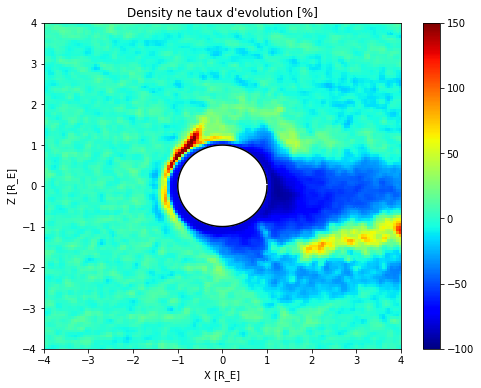

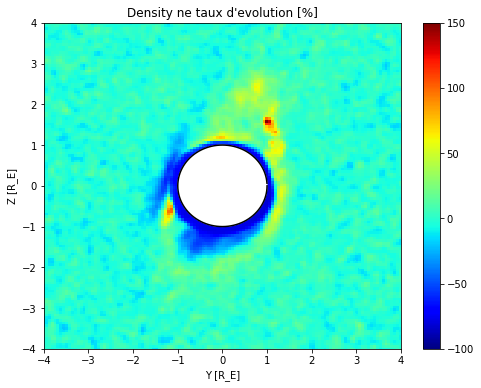

In [64]:
colmap = ["jet","Greens_r","viridis"]
ncol = 0  # numero de la colormap
fig_size = [[6,9.5],[6,7.5],[8,6],[10,6]] #differentes tailles de fenetres
figsize_Xnum = 2  #numero de la taille de la fenetre pour les plans XZ et XY
figsize_Ynum = 2  #numero de la taille de la fenetre pour les plans YZ

lim_Ne={"min":-100, "max":150}
lim_X = {"min":-4.0, "max":4}
lim_Y = {"min":-4.0, "max":4}
lim_Z = {"min":-4.0, "max":4}

ax_labels = {"x":"X [R_E]", "y":"Y [R_E]"}
fig_title = "Density ne taux d'evolution [%]"
fig_name = "Dn_ne_evolution_XY_Europa_E4_flyby.png"
plot_fig(X_XY,Y_XY,Dn_tx_evol_XY,lim_Ne,lim_X,lim_Y,colmap[ncol],fig_name,fig_title,ax_labels,fig_size[figsize_Xnum])

ax_labels = {"x":"X [R_E]", "y":"Z [R_E]"}
fig_title = "Density ne taux d'evolution [%]"
fig_name = "Dn_ne_evolution_XZ_Europa_E4_flyby.png"
plot_fig(X_XZ,Z_XZ,Dn_tx_evol_XZ,lim_Ne,lim_X,lim_Z,colmap[ncol],fig_name,fig_title,ax_labels,fig_size[figsize_Xnum])

ax_labels = {"x":"Y [R_E]", "y":"Z [R_E]"}
fig_title = "Density ne taux d'evolution [%]"
fig_name = "Dn_ne_evolution_YZ_Europa_E4_flyby.png"
plot_fig(Y_YZ,Z_YZ,Dn_tx_evol_YZ,lim_Ne,lim_Y,lim_Z,colmap[ncol],fig_name,fig_title,ax_labels,fig_size[figsize_Xnum])



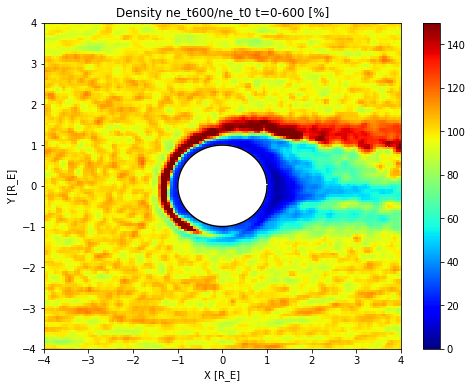

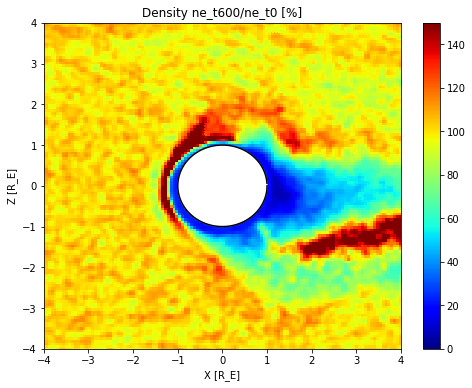

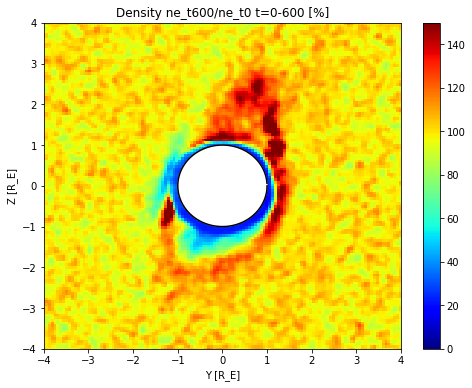

In [67]:
lim_Ne={"min":0, "max":150}
lim_X = {"min":-4.0, "max":4}
lim_Y = {"min":-4.0, "max":4}
lim_Z = {"min":-4.0, "max":4}

ax_labels = {"x":"X [R_E]", "y":"Y [R_E]"}
fig_title = "Density ne_t600/ne_t0 t=0-600 [%]"
fig_name = "Dn_ne_evolution_XY_Europa_E4_flyby.png"
plot_fig(X_XY,Y_XY,Dn_diff_XY,lim_Ne,lim_X,lim_Y,colmap[ncol],fig_name,fig_title,ax_labels,fig_size[figsize_Xnum])

ax_labels = {"x":"X [R_E]", "y":"Z [R_E]"}
fig_title = "Density ne_t600/ne_t0 [%]"
fig_name = "Dn_ne_evolution_XZ_Europa_E4_flyby.png"
plot_fig(X_XZ,Z_XZ,Dn_diff_XZ,lim_Ne,lim_X,lim_Z,colmap[ncol],fig_name,fig_title,ax_labels,fig_size[figsize_Xnum])

ax_labels = {"x":"Y [R_E]", "y":"Z [R_E]"}
fig_title = "Density ne_t600/ne_t0 t=0-600 [%]"
fig_name = "Dn_ne_evolution_YZ_Europa_E4_flyby.png"
plot_fig(Y_YZ,Z_YZ,Dn_diff_YZ,lim_Ne,lim_Y,lim_Z,colmap[ncol],fig_name,fig_title,ax_labels,fig_size[figsize_Xnum])